In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import detrend
from datetime import datetime

%matplotlib inline

In [169]:
def estimateGaussian(x):
    m, n = x.shape
    mu = np.zeros((n, 1))
    sigma2 = np.zeros((n, 1))
    mu = (1/m)*np.nansum(x, axis=0)
    sigma2 = (1/(m-1))*np.nansum((x-mu)**2,axis=0)  
    return mu, sigma2

def plotdata(x):
    ax = np.array(len(x[0]))
    fig, (ax) = plt.subplots(nrows=21, ncols=1, figsize=(16, 20) )
    for i in range(21):
        ax[i].plot(x[:,i])
          
def detrending (x):
    s = np.zeros((len(x), len(x[0])))
    for i in range(len(x)):
        for j in range(len(x[0])):
            s[i,j] = np.nansum(x[i,j])
    for i in range(len(x[0])):
        s[:,i] = detrend(s[:,i])
    return s

def smooothing(x, k):
    s = np.zeros((len(x), len(x[0])))   
    for i in range(k, len(x)):
        for j in range(len(x[0])):           
            s[i,j] = np.sum(x[i-k:i,j])/k
    return s

def expotential ( f_detrend, alpha = 0.1):
    s = np.zeros((len(f_detrend), len(f_detrend[0])))
    s[0,:] = f_detrend[0,:]
    for i in range(1,len(f_detrend)):
        s[i,:] = alpha*f_detrend[i,:]+(1-alpha)*s[i-1,:]
    return s

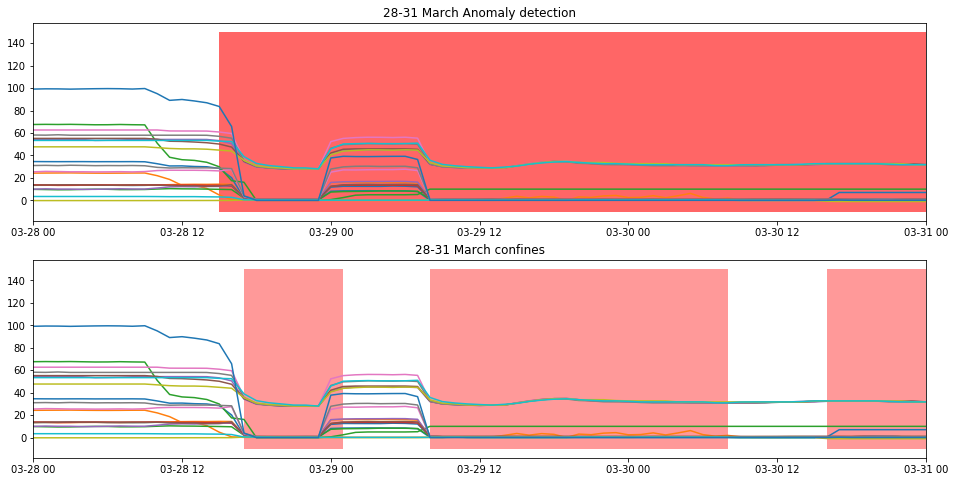

In [170]:
# Read files
df= pd.read_excel('Data_new_21.xlsx')
names=['Date & Time','FI_C771J1.PV','FI_C771J2.PV','HC_C771L.OP','HC_C771J1.OP','TI_C771T11.PV','TI_C771T21.PV','TI_C771T31.PV','TI_C771T41.PV','TI_C771T51.PV','TI_C771T61.PV','VI_C771X11.PV','VI_C771X21.PV','VI_C771W11.PV','VI_C771W21.PV','VI_C771V11.PV','VI_C771V21.PV','VI_C771U11.PV','VI_C771U21.PV','PI_C771C2.PV','PI_C771H.PV','IT_C771F']

# Smoothing and estimating
data = np.array(df)
s = expotential(detrending(data[:,1:9200].astype(np.float)),0.99)
mu, sigma2 = estimateGaussian(s)

# Count anomaly
y = np.zeros(len(s))
t = np.zeros(len(s))
for i in range(len(s)):
    for j in range(len(s[0])):
        if (abs(s[i,j] - mu[j]) > 3*(sigma2[j])):
            y[i]=1


# Count bed points woth confines
s = data[:,1:]
y_them = np.zeros(len(s))
t = np.zeros(len(s))
for i in range(len(s)):
    for j in range(len(s[0])):
        if ((s[i,j]>110 and (j == 4 or j ==5 or j ==6))          # 110 - 115
            or (s[i,j] > 100  and (j ==8 or j==9))                # 100 - 110
            or (s[i,j] > 60 and j in [10,11,12,13,14,15,16,17])   # 60 - 80
            or ((s[i,j] < -0.313 or s[i,j] > 0) and j==18)
            or (s[i,j]>5 and j==19)):
            y_them[i]=1

#  Date time axis X
# date_var = [datetime.strptime(data[i,0], '%Y-%m-%d %H:%M:%S') for i in range(len(data))]   

# Plots _ all graphics
# ax = np.array(len(data[0]))
# fig, (ax) = plt.subplots(nrows=21, ncols=1, figsize=(16, 60) )
# plt.subplots_adjust(wspace=0, hspace=0.35)
# for i in range(1,22):
#     ax[i-1].plot(date_var, data[:,i],'b')
#     ax[i-1].set_title(names[i])
#     ax[i-1].fill_between(date_var, max(data[:,i]), where = y==1, facecolor='red', alpha='0.5', interpolate=True)
#     ax[i-1].set_xlim(datetime(2018, 6, 10, 0, 0), datetime(2018, 7, 27, 0, 0))

fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize = (16,8) )

ax1.plot(data[:,0], data[:,1:])
ax1.fill_between(data[:,0],-10, 150, where= y==1, facecolor='red', alpha=0.6)
ax1.set_xlim(datetime(2018,3,28,0,0), datetime(2018,3,31,0,0))
ax1.set_title('28-31 March Anomaly detection')

ax2.plot(data[:,0], data[:,1:])
ax2.fill_between(data[:,0],-10, 150, where= y_them==1, facecolor='red', alpha=0.4)
ax2.set_title('28-31 March confines')
ax2.set_xlim(datetime(2018,3,28,0,0), datetime(2018,3,31,0,0))
plt.show()


# plt.figure(figsize=(16,4))
# plt.plot(data[:,0], data[:,1:])
# plt.fill_between(data[:,0],-10, 150, where= y_them==1, facecolor='red', alpha=0.4)
# plt.title('28-31 March confines')
# # plt.xlim(datetime(2018,9,22,10,0), datetime(2018,9,26,22,0))
# # plt.xlim(datetime(2018,9,1,10,0), datetime(2018,9,30,22,0))
# plt.show()